In [2]:
import tensorflow as tf
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
import time  

x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

np.random.seed(116)  
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

# 将打乱后的数据集分割为训练集和测试集，训练集为前120行，测试集为后30行
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

# 转换x的数据类型，否则后面矩阵相乘时会因数据类型不一致报错
x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)


train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


w1 = tf.Variable(tf.random.truncated_normal([4, 3], stddev=0.1, seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3], stddev=0.1, seed=1))

lr = 0.1  # 学习率为0.1
train_loss_results = []  # 将每轮的loss记录在此列表中，为后续画loss曲线提供数据
test_acc = []  # 将每轮的acc记录在此列表中，为后续画acc曲线提供数据
epoch = 500  # 循环500轮
loss_all = 0  # 每轮分4个step，loss_all记录四个step生成的4个loss的和

##########################################################################
m_w, m_b = 0, 0
v_w, v_b = 0, 0
beta1, beta2 = 0.9, 0.999
delta_w, delta_b = 0, 0
global_step = 0
##########################################################################


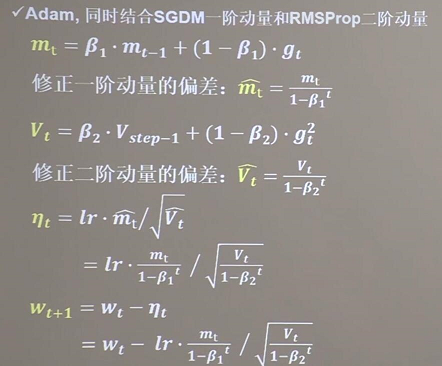

Epoch:0,loss0.21984169632196426
测试部分
test acc: 0.5333333333333333
---------
Epoch:1,loss0.14480622671544552
测试部分
test acc: 0.5333333333333333
---------
Epoch:2,loss0.10274342261254787
测试部分
test acc: 0.6666666666666666
---------
Epoch:3,loss0.08922167308628559
测试部分
test acc: 0.5333333333333333
---------
Epoch:4,loss0.08600791450589895
测试部分
test acc: 0.9
---------
Epoch:5,loss0.06994976289570332
测试部分
test acc: 0.8
---------
Epoch:6,loss0.06724478956311941
测试部分
test acc: 0.8
---------
Epoch:7,loss0.06104544270783663
测试部分
test acc: 1.0
---------
Epoch:8,loss0.055738057009875774
测试部分
test acc: 0.9333333333333333
---------
Epoch:9,loss0.05405292101204395
测试部分
test acc: 1.0
---------
Epoch:10,loss0.04909192584455013
测试部分
test acc: 1.0
---------
Epoch:11,loss0.04825872555375099
测试部分
test acc: 1.0
---------
Epoch:12,loss0.044586071744561195
测试部分
test acc: 1.0
---------
Epoch:13,loss0.04371032351627946
测试部分
test acc: 1.0
---------
Epoch:14,loss0.04151798691600561
测试部分
test acc: 1.0
---------
Epo

test acc: 1.0
---------
Epoch:139,loss0.017561486922204494
测试部分
test acc: 1.0
---------
Epoch:140,loss0.01753123663365841
测试部分
test acc: 1.0
---------
Epoch:141,loss0.01750132767483592
测试部分
test acc: 1.0
---------
Epoch:142,loss0.017471773084253073
测试部分
test acc: 1.0
---------
Epoch:143,loss0.017442532116547227
测试部分
test acc: 1.0
---------
Epoch:144,loss0.017413603840395808
测试部分
test acc: 1.0
---------
Epoch:145,loss0.01738501782529056
测试部分
test acc: 1.0
---------
Epoch:146,loss0.01735673495568335
测试部分
test acc: 1.0
---------
Epoch:147,loss0.01732874009758234
测试部分
test acc: 1.0
---------
Epoch:148,loss0.017301083775237203
测试部分
test acc: 1.0
---------
Epoch:149,loss0.01727369101718068
测试部分
test acc: 1.0
---------
Epoch:150,loss0.01724658557213843
测试部分
test acc: 1.0
---------
Epoch:151,loss0.017219797242432833
测试部分
test acc: 1.0
---------
Epoch:152,loss0.017193264327943325
测试部分
test acc: 1.0
---------
Epoch:153,loss0.017167016165331006
测试部分
test acc: 1.0
---------
Epoch:154,loss0.0171410

test acc: 1.0
---------
Epoch:274,loss0.015220290166325867
测试部分
test acc: 1.0
---------
Epoch:275,loss0.015210395096801221
测试部分
test acc: 1.0
---------
Epoch:276,loss0.015200563124381006
测试部分
test acc: 1.0
---------
Epoch:277,loss0.015190812177024782
测试部分
test acc: 1.0
---------
Epoch:278,loss0.015181106980890036
测试部分
test acc: 1.0
---------
Epoch:279,loss0.015171458944678307
测试部分
test acc: 1.0
---------
Epoch:280,loss0.01516188238747418
测试部分
test acc: 1.0
---------
Epoch:281,loss0.015152363339439034
测试部分
test acc: 1.0
---------
Epoch:282,loss0.015142893185839057
测试部分
test acc: 1.0
---------
Epoch:283,loss0.015133499749936163
测试部分
test acc: 1.0
---------
Epoch:284,loss0.015124144847504795
测试部分
test acc: 1.0
---------
Epoch:285,loss0.01511485071387142
测试部分
test acc: 1.0
---------
Epoch:286,loss0.015105649014003575
测试部分
test acc: 1.0
---------
Epoch:287,loss0.01509645115584135
测试部分
test acc: 1.0
---------
Epoch:288,loss0.015087344567291439
测试部分
test acc: 1.0
---------
Epoch:289,loss0.015

Epoch:412,loss0.014271582127548754
测试部分
test acc: 1.0
---------
Epoch:413,loss0.014266838901676238
测试部分
test acc: 1.0
---------
Epoch:414,loss0.01426211791113019
测试部分
test acc: 1.0
---------
Epoch:415,loss0.014257428119890392
测试部分
test acc: 1.0
---------
Epoch:416,loss0.014252756023779511
测试部分
test acc: 1.0
---------
Epoch:417,loss0.014248086954466999
测试部分
test acc: 1.0
---------
Epoch:418,loss0.014243459678255022
测试部分
test acc: 1.0
---------
Epoch:419,loss0.01423885056283325
测试部分
test acc: 1.0
---------
Epoch:420,loss0.014234248432330787
测试部分
test acc: 1.0
---------
Epoch:421,loss0.014229674939997494
测试部分
test acc: 1.0
---------
Epoch:422,loss0.01422511984128505
测试部分
test acc: 1.0
---------
Epoch:423,loss0.014220590004697442
测试部分
test acc: 1.0
---------
Epoch:424,loss0.014216066687367857
测试部分
test acc: 1.0
---------
Epoch:425,loss0.014211585163138807
测试部分
test acc: 1.0
---------
Epoch:426,loss0.01420710829552263
测试部分
test acc: 1.0
---------
Epoch:427,loss0.014202650636434555
测试部分
test

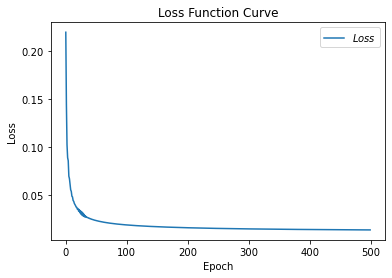

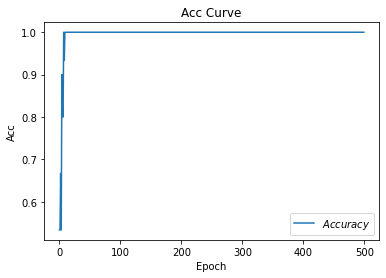

In [5]:
now_time = time.time()
for epoch in range(epoch):
    for step,(x_train,y_train) in enumerate(train_db):
        ####
        global_step += 1
        ####
        with tf.GradientTape() as tape:
            y = tf.matmul(x_train,w1) + b1
            y = tf.nn.softmax(y)
            y_ = tf.one_hot(y_train,depth=3)
            loss = tf.reduce_mean(tf.square(y_ -y))
            loss_all += loss.numpy()
        grads = tape.gradient(loss,[w1,b1])
        
        ######adam#####
        m_w = beta1 * m_w + (1 - beta1) * grads[0]
        m_b = beta1 * m_b + (1 - beta1) * grads[1]
        v_w = beta2 * v_w + (1 - beta2) * tf.square(grads[0])
        v_b = beta2 * v_b + (1 - beta2) * tf.square(grads[1])
        
        m_w_correction = m_w / (1 - tf.pow(beta1,int(global_step)))
        m_b_correction = m_b / (1 - tf.pow(beta1,int(global_step)))
        v_w_correction = v_w / (1 - tf.pow(beta2,int(global_step)))
        v_b_correction = v_b / (1 - tf.pow(beta2,int(global_step)))
        
        w1.assign_sub(lr * m_w_correction / tf.sqrt(v_w_correction))
        b1.assign_sub(lr * m_b_correction / tf.sqrt(v_b_correction))
    print("Epoch:{},loss{}".format(epoch,loss_all/4))
    train_loss_results.append(loss_all / 4)
    loss_all = 0
    
    print("测试部分")
    total_correct,total_number = 0,0
    for x_test,y_test in test_db:
        y = tf.matmul(x_test,w1) + b1
        y = tf.nn.softmax(y)
        pred = tf.argmax(y,axis=1)
        pred = tf.cast(pred,y_test.dtype)
        correct = tf.cast(tf.equal(pred,y_test),dtype=tf.int32)
        correct = tf.reduce_sum(correct)
        total_correct += int(correct)
         # total_number为测试的总样本数，也就是x_test的行数，shape[0]返回变量的行数
        total_number += x_test.shape[0]
    acc = total_correct / total_number
    test_acc.append(acc)
    print("test acc:",acc)
    print("---------")
total_time = time.time() - now_time
print("total_time:",total_time)

# 绘制loss曲线
plt.title("Loss Function Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_loss_results,label="$Loss$")
# 逐点画出trian_loss_results值并连线，连线图标是Loss
plt.legend() #画出曲线图标
plt.show()

# 绘制acc曲线
plt.title("Acc Curve")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.plot(test_acc,label="$Accuracy$")
#逐点画出test_acc值并连线，连线图标是Accuracy
plt.legend()
plt.show()